<a href="https://colab.research.google.com/github/shahcharu/DeepFake_Image_Recognition/blob/main/DeepFake_DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize
from sklearn.feature_extraction import image
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fftpack import dct
import tensorflow as tf
import matplotlib.pyplot as plt
# Function to extract DCT features from an image
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)

    return img.flatten()

# Function to load images from folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img = io.imread(os.path.join(folder_path, filename), as_gray=True)
        img = resize(img, image_size)
        images.append(img)
    return images

# Load real and fake images from folders
real_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Real Images')
fake_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Fake Images')

# Extract DCT features from images
X_real = np.array([extract_dct(img) for img in real_images])
X_fake = np.array([extract_dct(img) for img in fake_images])
# Create labels for real and fake images
y_real = np.ones(len(X_real))
y_fake = np.zeros(len(X_fake))
# Combine real and fake images
X = np.vstack((X_real, X_fake))
# Combine real and fake labels
y = np.hstack((y_real, y_fake))
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Ridge Regression classifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = ridge_clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import pickle
with open('my_model.pkl', 'wb') as f:
    pickle.dump(ridge_clf, f)


Accuracy: 1.0


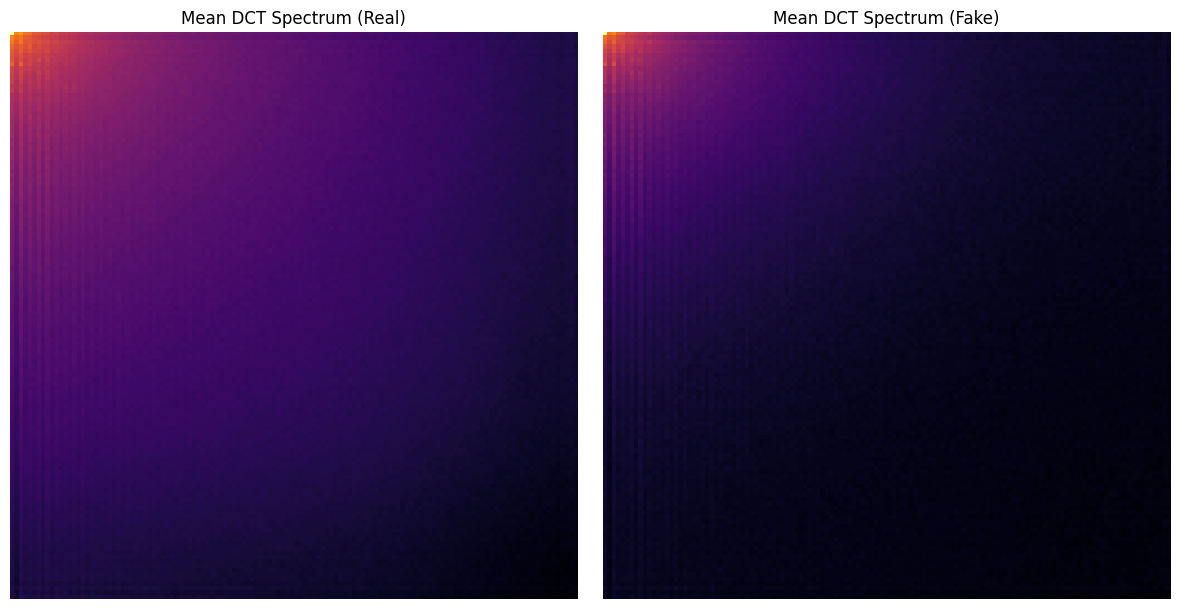

Mean DCT Values for Real Images:
[[ 4.00907188  1.44584449  1.77392905 ... -4.48588976 -4.49570028
  -4.63319973]
 [ 1.47506409  0.80925533  1.04469225 ... -4.65012703 -4.62477916
  -4.71605447]
 [ 1.16802326  0.49402113  1.0950378  ... -4.50214079 -4.51198037
  -4.60543135]
 ...
 [-4.53284258 -4.77632006 -4.44048719 ... -5.57147089 -5.51838308
  -5.47554368]
 [-4.62982511 -5.03081461 -4.54690059 ... -5.59969784 -5.49935204
  -5.63557138]
 [-4.54086348 -4.95991498 -4.42783148 ... -5.74705728 -5.65865835
  -5.65454697]]

Mean DCT Values for Fake Images:
[[ 3.99567024  1.45424495  1.7548939  ... -3.78862228 -3.70177561
  -3.85142239]
 [ 1.41088694  0.79162888  0.94687201 ... -3.85465365 -3.73539967
  -3.84322495]
 [ 1.15228661  0.4133576   1.09354596 ... -3.77620851 -3.65151163
  -3.83447874]
 ...
 [-3.72874115 -3.99134855 -3.72439778 ... -4.14073492 -4.09010128
  -4.00214982]
 [-3.86827915 -4.05346934 -3.82406569 ... -4.13285445 -4.17379662
  -4.17807037]
 [-3.7894476  -4.03254712 -3.79

In [4]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize
from scipy.fftpack import dct
import matplotlib.pyplot as plt

# Function to extract DCT features from an image
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    return img

# Function to load images from folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img = io.imread(os.path.join(folder_path, filename), as_gray=True)
        img = resize(img, image_size)
        images.append(img)
    return images

# Load real and fake images from folders
real_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Real Images')
fake_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Fake Images')

# Extract DCT features from images
dct_real = [extract_dct(img) for img in real_images]
dct_fake = [extract_dct(img) for img in fake_images]

# Compute mean DCT spectrum
mean_dct_real = np.mean((dct_real), axis=0)
mean_dct_fake = np.mean((dct_fake), axis=0)

# Plot mean DCT spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow((mean_dct_real), cmap='inferno')
plt.title('Mean DCT Spectrum (Real)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow((mean_dct_fake ), cmap='inferno')
plt.title('Mean DCT Spectrum (Fake)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print DCT values for real and fake images
print("Mean DCT Values for Real Images:")
print(mean_dct_real)

print("\nMean DCT Values for Fake Images:")
print(mean_dct_fake)


In [ ]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize
from sklearn.feature_extraction import image
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fftpack import dct
import tensorflow as tf
import math
import numpy as np
import h5py
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops


# Function to extract DCT features from an image
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)
    return img.flatten()

def pixel_image(img):
   return img.flatten()

# Function to load images from folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img = io.imread(os.path.join(folder_path, filename), as_gray=True)
        img = resize(img, image_size)
        images.append(img)
    return images

# Load real and fake images from folders
real_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Real Images')
fake_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Fake Images')
# Extract DCT features from images
X_real = np.array([pixel_image(img) for img in real_images])
X_fake = np.array([pixel_image(img) for img in fake_images])
# Create labels for real and fake images
y_real = np.ones(len(X_real))
y_fake = np.zeros(len(X_fake))
# Combine real and fake images
X = np.vstack((X_real, X_fake))
# Combine real and fake labels
y = np.hstack((y_real, y_fake))
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Ridge Regression classifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = ridge_clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5475


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl s

In [ ]:
import numpy as np
import pickle
from skimage import io
from skimage.transform import resize
from scipy.fftpack import dct
import gradio as gr

def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)
    return img.flatten()

def preprocess_image(nparr, image_size=(128, 128)):
    # Convert the NumPy array to grayscale
    if len(nparr.shape) == 3 and nparr.shape[2] == 3:
        # Convert RGB image to grayscale
        img = np.dot(nparr, [0.2989, 0.5870, 0.1140])
    else:
        # Assuming the input is already grayscale
        img = nparr

    # Resize the image
    img = resize(img, image_size)

    # Extract DCT features
    dct_features = extract_dct(img)

    return dct_features

# Load the saved model
with open('my_model.pkl', 'rb') as f:
    ridge_clf = pickle.load(f)

# def predict_image(image):
#     dct_features = preprocess_image(image)
#     prediction = ridge_clf.predict([dct_features])
#     if prediction[0] == 1 :
#       return "real.png"
#     elif  prediction[0] == 0 :
#       return "fake.png"
#     else:
#       return image

def predict_image(image):
    dct_features = preprocess_image(image)
    prediction = ridge_clf.predict([dct_features])
    if prediction[0] == 1 :
      return "Real"
    elif  prediction[0] == 0 :
      return "Fake"
    else:
      return "error"

image_input = gr.Image(label="Upload Image",type="numpy")
output = gr.Textbox(label="Prediction",type="text")

io = gr.Interface(fn=predict_image, inputs=image_input, outputs=output, title="Image Forgery Detection")
io.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://71b96190e42943916f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
